In [215]:
import pickle
import pandas
import numpy
from n2lite import n2lite
import matplotlib
import matplotlib.pyplot as plt

In [248]:
fn_hot = '20181110_175505'
fn_cold = '20181110_174431'
path_hot = '/home/amigos/data/sql/sisv_sweep/' + fn_hot
path_cold = '/home/amigos/data/sql/sisv_sweep/' + fn_cold

In [249]:
_hot = n2lite.N2lite(path_hot + '/param.db')
_hot_roach = n2lite.N2lite(path_hot + '/roach2.db')
_cold = n2lite.N2lite(path_cold + '/param.db')
_cold_roach = n2lite.N2lite(path_cold + '/roach2.db')

In [250]:
backend = {}
backend_roach ={}

backend['power_1'] = '3r'
backend['power_2'] = '1ll'
backend['xffts_1'] = '5l'

# backend_roach['roach_2_1'] = '2l'
backend_roach['roach_3_1'] = '3l'
backend_roach['roach_3_2'] = '1lu'
backend_roach['roach_4_1'] = '4l'
backend_roach['roach_5_1'] = '5r'

In [251]:
for a, b in backend.items():
    print(a), print(b)

power_1
3r
power_2
1ll
xffts_1
5l


In [252]:
# param.

initial_voltage = 6.
final_voltage = 9.
step = 0.05
roop = int((final_voltage - initial_voltage) / step) + 1

In [253]:
_hot_roach

In [254]:
# data

hot = _hot.read_pandas_all()
cold = _cold.read_pandas_all()
hot_roach = _hot_roach.read_pandas_all()
cold_roach = _cold_roach.read_pandas_all()
for num in backend_roach.keys():
    hot_roach['data{}'.format(num[-3:])] = [pickle.loads(_) 
                                            for _ in hot_roach['data{}'.format(num[-3:])]]
    cold_roach['data{}'.format(num[-3:])] = [pickle.loads(_) 
                                             for _ in cold_roach['data{}'.format(num[-3:])]]

In [255]:
# spec --> total power

for num in backend_roach.keys():
    hot_roach['data{}'.format(num[-3:])] = [numpy.sum(_) 
                                            for _ in hot_roach['data{}'.format(num[-3:])]]
    cold_roach['data{}'.format(num[-3:])] = [numpy.sum(_) 
                                             for _ in cold_roach['data{}'.format(num[-3:])]]

In [256]:
# groupby method

bins = numpy.arange(initial_voltage, final_voltage, step)
print(bins)

def assort(x):
    if x < bins[0]: return 0
    for i in range(len(bins)-1):
        if x >= bins[i] and x < bins[i+1]:return i + 1
        continue
    return len(bins)

[6.   6.05 6.1  6.15 6.2  6.25 6.3  6.35 6.4  6.45 6.5  6.55 6.6  6.65
 6.7  6.75 6.8  6.85 6.9  6.95 7.   7.05 7.1  7.15 7.2  7.25 7.3  7.35
 7.4  7.45 7.5  7.55 7.6  7.65 7.7  7.75 7.8  7.85 7.9  7.95 8.   8.05
 8.1  8.15 8.2  8.25 8.3  8.35 8.4  8.45 8.5  8.55 8.6  8.65 8.7  8.75
 8.8  8.85 8.9  8.95]


In [257]:
for key, value in backend.items():
    hot['{}_flag'.format(key)] = hot['sis_vol_{}'.format(value)].apply(assort)
    cold['{}_flag'.format(key)] = hot['sis_vol_{}'.format(value)].apply(assort)

In [258]:
hot

,time,sis_vol_2l,sis_vol_2r,sis_vol_3l,sis_vol_3r,sis_vol_4l,sis_vol_4r,sis_vol_5l,sis_vol_5r,sis_vol_1lu,...,loatt_5l,loatt_5r,loatt_1l,loatt_1r,power_1,power_2,xffts_1,power_1_flag,power_2_flag,xffts_1_flag
0,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.580078,-15.351562,3.033786e+15,1,1,0
1,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.638672,-15.527344,3.084966e+15,1,1,0
2,1.541873e+09,6.103516,6.152344,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.580078,-15.585938,3.100081e+15,1,1,0
3,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.981445,5.517578,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.580078,-15.585938,3.114637e+15,1,1,0
4,1.541873e+09,6.103516,6.152344,6.005859,6.005859,6.005859,5.957031,5.541992,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.521484,-15.585938,3.114637e+15,1,1,0
5,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.957031,5.541992,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.550781,-15.556641,2.883493e+15,1,1,0
6,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.550781,-15.585938,2.883493e+15,1,1,0
7,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.981445,5.517578,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.609375,-15.380859,2.626620e+15,1,1,0
8,1.541873e+09,6.079102,6.152344,6.005859,6.005859,5.981445,5.957031,5.517578,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.609375,-15.498047,2.855116e+15,1,1,0
9,1.541873e+09,6.079102,6.127930,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,2.0,2.0,2.0,2.0,-24.609375,-15.556641,2.752964e+15,1,1,0


In [259]:
hot_groupby = [
    hot.groupby('{}_flag'.format(_backend)) for _backend in backend.keys()
]
hot_mean = [
    _hot_groupby.mean() for _hot_groupby in hot_groupby
]
cold_groupby = [
    cold.groupby('{}_flag'.format(_backend)) for _backend in backend.keys()
]
cold_mean = [
    _cold_groupby.mean() for _cold_groupby in cold_groupby
]

In [260]:
hot_mean[0]['sis_vol_3r']

power_1_flag
1     6.005859
2     6.054688
3     6.104158
4     6.153826
5     6.204489
6     6.276948
7     6.343810
8     6.384198
9     6.426118
10    6.471330
11    6.519578
12    6.567931
13    6.622006
14    6.665039
15    6.715471
16    6.763509
17    6.823996
18    6.869629
19    6.922050
20    6.971470
21    7.031250
22    7.079592
23    7.128906
24    7.177496
25    7.226562
26    7.275391
27    7.324219
28    7.373761
29    7.422528
30    7.471010
31    7.526275
32    7.574408
33    7.632585
34    7.680805
35    7.736098
36    7.785903
37    7.836657
38    7.885506
39    7.934448
40    7.983398
41    8.028817
42    8.078291
43    8.120696
44    8.156139
45    8.208436
46    8.253247
47    8.322831
48    8.398438
49    8.447144
50    8.496094
51    8.544922
52    8.593750
53    8.642578
54    8.691406
55    8.739509
56    8.788253
57    8.829711
58    8.874825
59    8.919084
60    9.012575
Name: sis_vol_3r, dtype: float64

In [261]:
# data 2 dict
_data_hot = []
_data_cold = []
for _hot, _cold, _backend, _beam in zip(hot_mean, cold_mean, backend.keys(), backend.values()):
    _data_hot.append({_backend: [_hot['sis_vol_{}'.format(_beam)],
                                                            _hot['sis_cur_{}'.format(_beam)],
                                                            _hot['{}'.format(_backend)]]})
    _data_cold.append({_backend: [_cold['sis_vol_{}'.format(_beam)],
                                                            _cold['sis_cur_{}'.format(_beam)],
                                                            _cold['{}'.format(_backend)]]})

In [262]:
# raoch

for key, value in backend_roach.items():
    hot['{}_flag'.format(key)] = hot['sis_vol_{}'.format(value)].apply(assort)
    cold['{}_flag'.format(key)] = hot['sis_vol_{}'.format(value)].apply(assort)

In [263]:
idx_hot = [
    [
        hot['{}_flag'.format(_backend)][hot['{}_flag'.format(_backend)] == _flag].index
        for _flag in range(roop)
    ]
    for _backend in backend_roach.keys()
]

idx_cold = [
    [
        cold['{}_flag'.format(_backend)][cold['{}_flag'.format(_backend)] == _flag].index
        for _flag in range(roop)
    ]
    for _backend in backend_roach.keys()
]

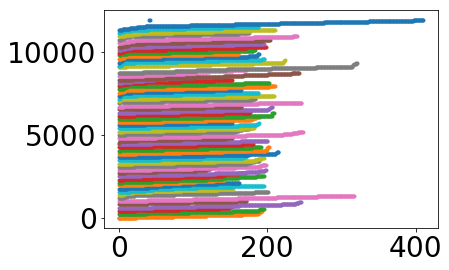

In [264]:
[plt.plot(idx_hot[2][i], '.') for i in range(roop)]
plt.show()

In [265]:
time_hot = [
    [
        hot['time'][_idx] for _idx in idx_hot[_]
    ]
    for _ in range(len(backend_roach))
]

separate_time_hot = [
    [
        [min(_time), max(_time)]  for _time in time_hot[_] if len(_time) >= 2
    ]
    for _ in range(len(backend_roach))
]

time_cold = [
    [
        cold['time'][_idx] for _idx in idx_cold[_]
    ]
    for _ in range(len(backend_roach))
]

separate_time_cold = [
    [
        [min(_time), max(_time)]  for _time in time_cold[_] if len(_time) >= 2
    ]
    for _ in range(len(backend_roach))
]

In [266]:
for i in separate_time_hot[3]:
    print(i)

[1541872511.985638, 1541872514.5351691]
[1541872510.2938526, 1541872519.7328706]
[1541872516.8480263, 1541872524.7170866]
[1541872521.8869321, 1541872528.7585623]
[1541872526.9224498, 1541872532.0174212]
[1541872532.0412395, 1541872536.8681335]
[1541872537.1965718, 1541872547.1413453]
[1541872543.902501, 1541872552.3000968]
[1541872548.033552, 1541872557.525027]
[1541872552.9265516, 1541872562.5162723]
[1541872557.6782682, 1541872567.598488]
[1541872562.6087997, 1541872572.6862075]
[1541872567.732196, 1541872577.462879]
[1541872572.7217634, 1541872582.7294872]
[1541872577.9234073, 1541872586.0189884]
[1541872583.0077412, 1541872592.8859587]
[1541872588.1318915, 1541872594.7017355]
[1541872593.093155, 1541872598.0914366]
[1541872598.1264186, 1541872603.1723373]
[1541872603.301412, 1541872608.1648428]
[1541872608.2922516, 1541872613.342225]
[1541872613.35256, 1541872618.4422436]
[1541872618.4525397, 1541872623.4985774]
[1541872623.5105772, 1541872628.6035318]
[1541872628.627804, 15418726

In [267]:
idx_roach_hot = [
    [
        [
            __ for __, _t in enumerate(hot_roach['time{}'.format(_num[-3:])]) if _time[0] < _t < _time[1]
        ]
        for _time in separate_time_hot[_idx]
        ]
    for _idx, _num in enumerate(backend_roach.keys())
]

idx_roach_cold = [
    [
        [
            __ for __, _t in enumerate(cold_roach['time{}'.format(_num[-3:])]) if _time[0] < _t < _time[1]
        ]
        for _time in separate_time_cold[_idx]
        ]
for _idx, _num in enumerate(backend_roach.keys())
]

In [268]:
len(idx_roach_cold)

4

In [269]:
sis_vol_hot_roach = [
    [
        hot['sis_vol_{}'.format(beam)][__idx]
        for __idx in idx_roach_hot[_idx] if __idx != []
    ]
    for _idx, beam in enumerate(backend_roach.values())
]
sis_cur_hot_roach = [
    [
        hot['sis_cur_{}'.format(beam)][__idx]
        for __idx in idx_roach_hot[_idx] if __idx != []
    ]
    for _idx, beam in enumerate(backend_roach.values())
]

In [270]:
sis_vol_cold_roach = [
    [
        cold['sis_vol_{}'.format(beam)][__idx]
        for __idx in idx_roach_cold[_idx] if __idx != []
    ]
    for _idx, beam in enumerate(backend_roach.values())
]
sis_cur_cold_roach = [
    [
        cold['sis_cur_{}'.format(beam)][__idx]
        for __idx in idx_roach_cold[_idx] if __idx != []
    ]
    for _idx, beam in enumerate(backend_roach.values())
]

In [271]:
parse_hot_roach = [
    [
        hot_roach['data{}'.format(_num[-3:])][__idx]
        for __idx in idx_roach_hot[_idx] if __idx != []
    ]
    for _idx, _num in enumerate(backend_roach.keys())
]
parse_cold_roach = [
    [
        cold_roach['data{}'.format(_num[-3:])][__idx]
        for __idx in idx_roach_cold[_idx] if __idx != []
    ]
    for _idx, _num in enumerate(backend_roach.keys())
]

In [272]:
parse_hot_roach[0][1]

24    12711834
25    12728490
26    12724860
27    12725000
28    12718890
29    12705737
30    12727252
31    12724696
32    12734274
33    12715555
34    12716031
35    12722255
Name: data3_1, dtype: int64

In [273]:
# vol
sis_vol_hot_roach_mean = [
    [
        numpy.mean(vol)
        for vol in sis_vol_hot_roach[_idx]
    ]
    for _idx in range(len(backend_roach.keys()))
]
sis_vol_cold_roach_mean = [
    [
        numpy.mean(vol)
        for vol in sis_vol_cold_roach[_idx]
    ]
    for _idx in range(len(backend_roach.keys()))
]

# cur
sis_cur_hot_roach_mean = [
    [
        numpy.mean(cur)
        for cur in sis_cur_hot_roach[_idx]
    ]
    for _idx in range(len(backend_roach.keys()))
]
sis_cur_cold_roach_mean = [
    [
        numpy.mean(cur)
        for cur in sis_cur_cold_roach[_idx]
    ]
    for _idx in range(len(backend_roach.keys()))
]

# power
hot_roach_mean = [
    [
        numpy.mean(total_power)
        for total_power in parse_hot_roach[_idx]
    ]
    for _idx in range(len(backend_roach.keys()))
]

cold_roach_mean = [
    [
        numpy.mean(total_power)
        for total_power in parse_cold_roach[_idx]
    ]
    for _idx in range(len(backend_roach.keys()))
]

In [274]:
# data 2 dict
_data_hot_roach = []
_data_cold_roach = []
for _sis_vol, _sis_cur, _hot, _backend in zip(sis_vol_hot_roach_mean, sis_cur_hot_roach_mean, hot_roach_mean, backend_roach.keys()):
    _data_hot_roach.append({_backend: [_sis_vol, _sis_cur, _hot]})
for _sis_vol, _sis_cur, _hot, _backend in zip(sis_vol_hot_roach_mean, sis_cur_cold_roach_mean, hot_roach_mean, backend_roach.keys()):
    _data_cold_roach.append({_backend: [_sis_vol, _sis_cur, _hot]})

In [275]:
# finish
data_hot = _data_hot + _data_hot_roach
data_cold = _data_cold + _data_cold_roach

In [276]:
backend.update(backend_roach)

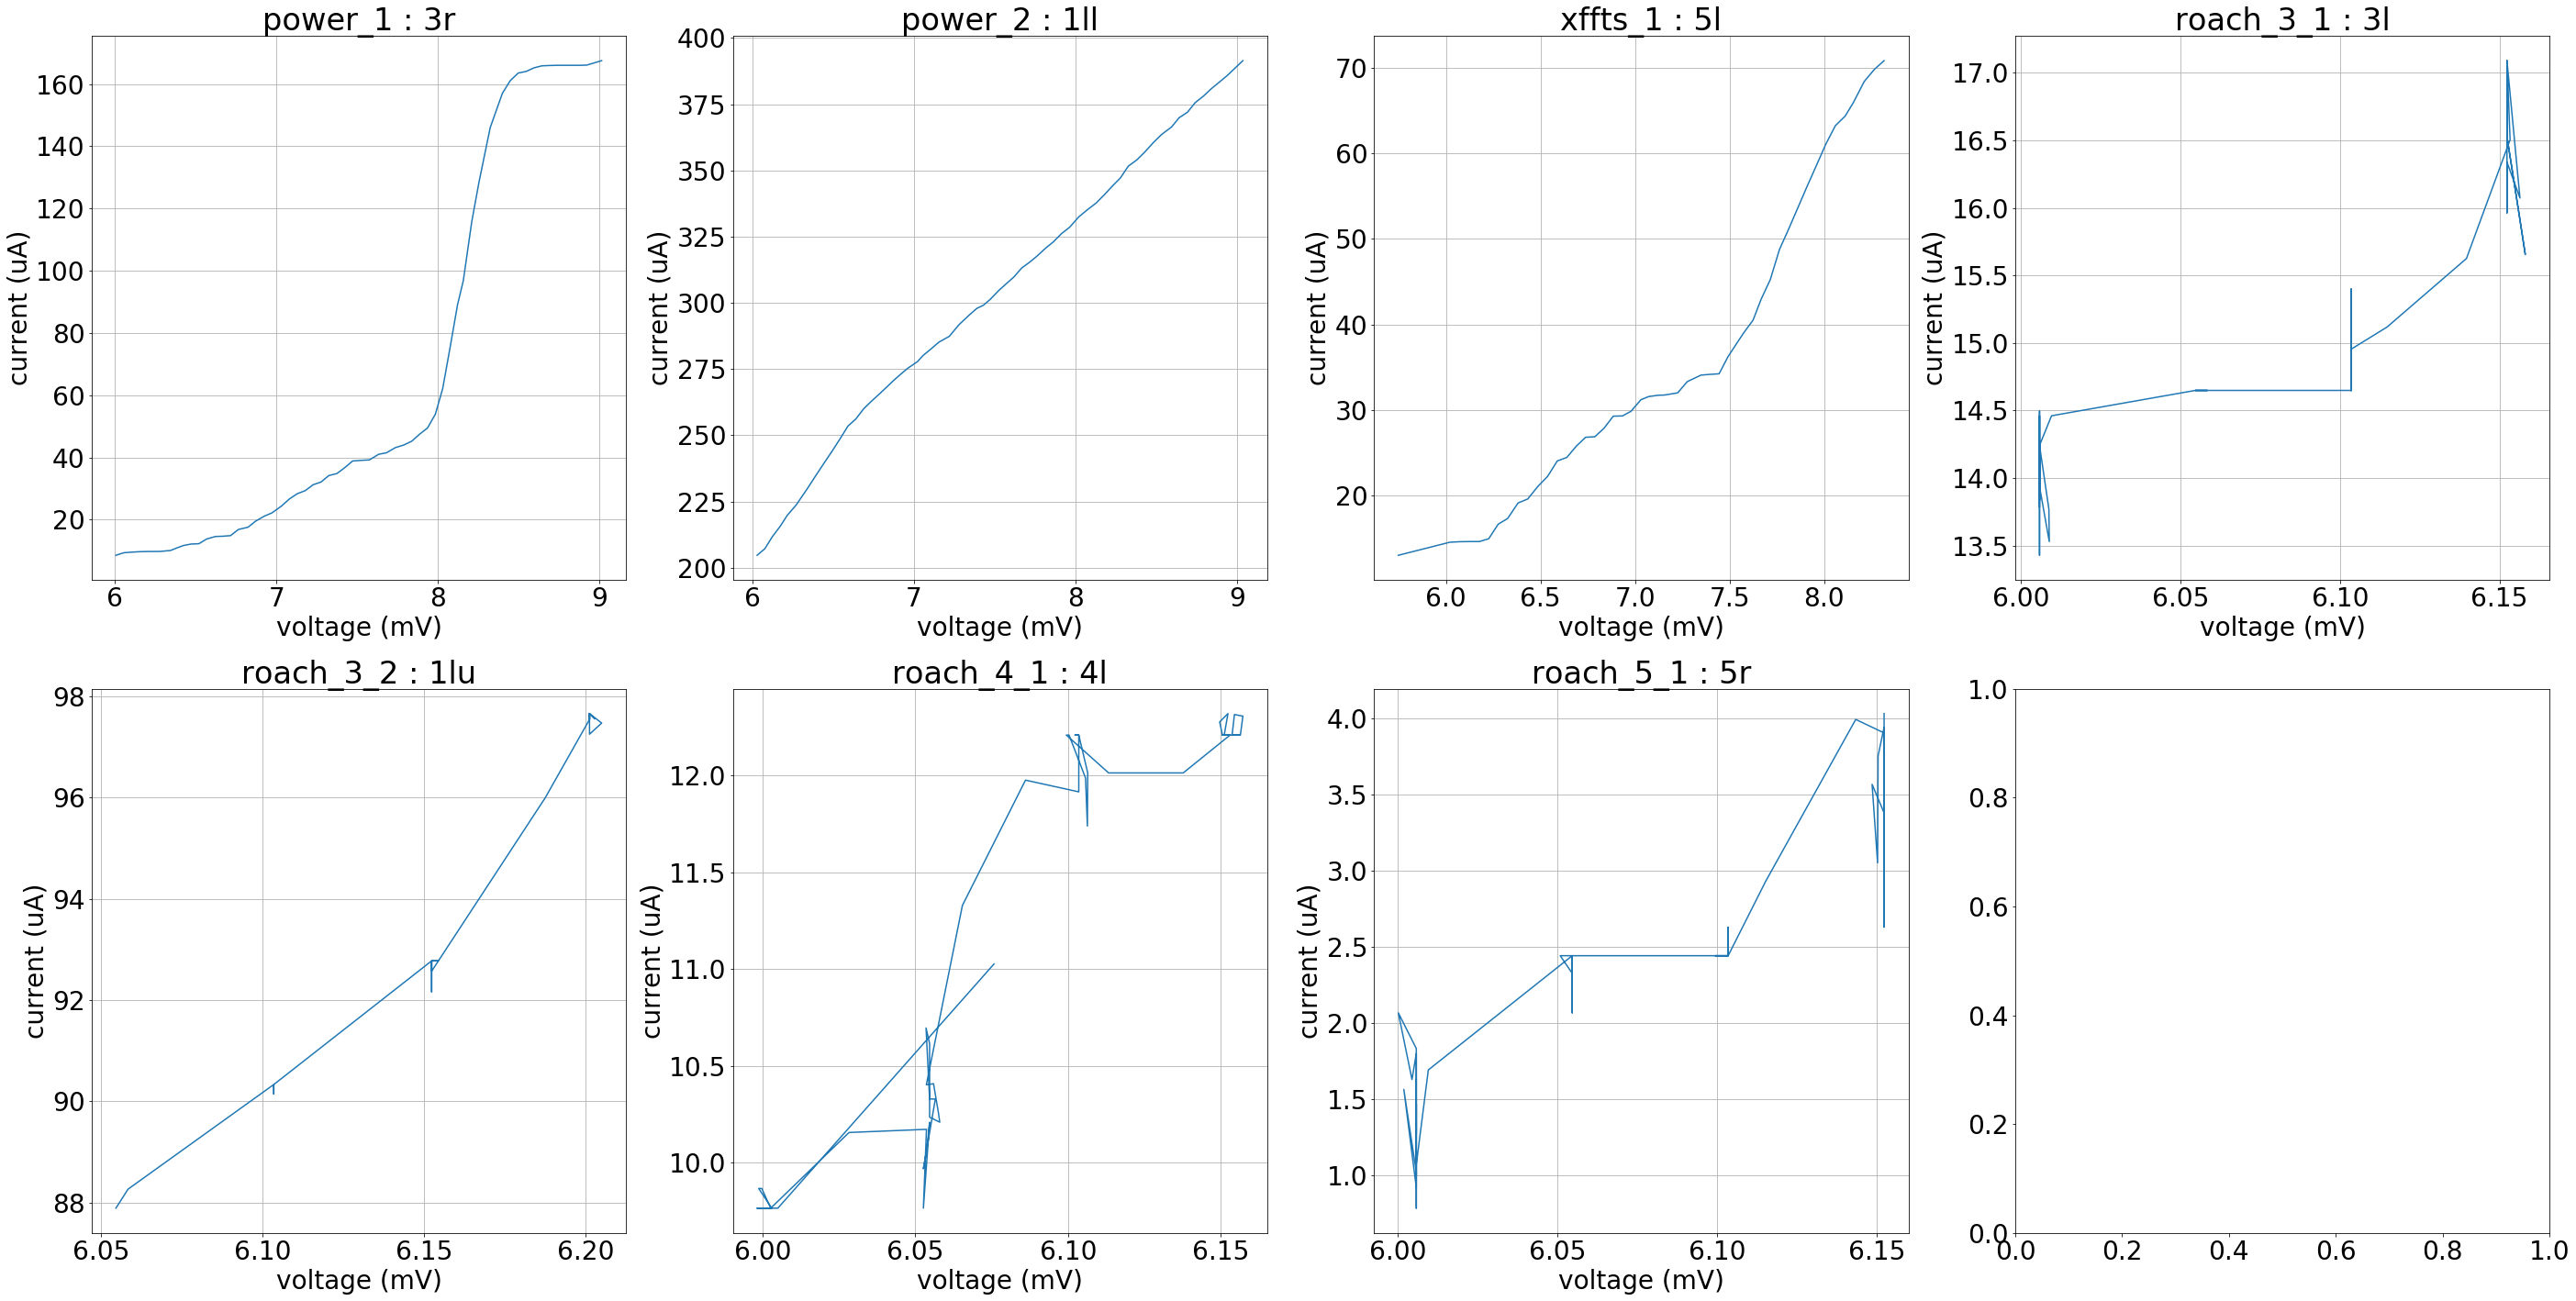

In [277]:
# plot

matplotlib.rcParams['figure.facecolor'] = 'white'

ncol = 4
nrow = 2
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 28

figsize = (ncol * 12, nrow * 12)
fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

# plot hot
for _ax, _data_hot, _backend, _beam in zip(ax, data_hot, backend.keys(), backend.values()):
    _ax.plot(_data_hot['{}'.format(_backend)][0], _data_hot['{}'.format(_backend)][1])
    _ax.set_xlabel('voltage (mV)')
    _ax.set_ylabel('current (uA)')
    _ax.set_title('{0} : {1}'.format(_backend, _beam))
    _ax.grid()

In [278]:
hot

,time,sis_vol_2l,sis_vol_2r,sis_vol_3l,sis_vol_3r,sis_vol_4l,sis_vol_4r,sis_vol_5l,sis_vol_5r,sis_vol_1lu,...,power_1,power_2,xffts_1,power_1_flag,power_2_flag,xffts_1_flag,roach_3_1_flag,roach_3_2_flag,roach_4_1_flag,roach_5_1_flag
0,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,-24.580078,-15.351562,3.033786e+15,1,1,0,1,2,1,1
1,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,-24.638672,-15.527344,3.084966e+15,1,1,0,1,2,1,1
2,1.541873e+09,6.103516,6.152344,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,-24.580078,-15.585938,3.100081e+15,1,1,0,1,2,1,1
3,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.981445,5.517578,6.005859,6.054688,...,-24.580078,-15.585938,3.114637e+15,1,1,0,1,2,1,1
4,1.541873e+09,6.103516,6.152344,6.005859,6.005859,6.005859,5.957031,5.541992,6.005859,6.054688,...,-24.521484,-15.585938,3.114637e+15,1,1,0,1,2,1,1
5,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.957031,5.541992,6.005859,6.054688,...,-24.550781,-15.556641,2.883493e+15,1,1,0,1,2,1,1
6,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,-24.550781,-15.585938,2.883493e+15,1,1,0,1,2,1,1
7,1.541873e+09,6.079102,6.152344,6.005859,6.005859,6.005859,5.981445,5.517578,6.005859,6.054688,...,-24.609375,-15.380859,2.626620e+15,1,1,0,1,2,1,1
8,1.541873e+09,6.079102,6.152344,6.005859,6.005859,5.981445,5.957031,5.517578,6.005859,6.054688,...,-24.609375,-15.498047,2.855116e+15,1,1,0,1,2,0,1
9,1.541873e+09,6.079102,6.127930,6.005859,6.005859,6.005859,5.957031,5.517578,6.005859,6.054688,...,-24.609375,-15.556641,2.752964e+15,1,1,0,1,2,1,1
